# High-dimensional representations (Exercise 20)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("axes", titlesize=16)
plt.rc("font", size=12)
from scipy.spatial.distance import pdist,squareform
from scipy.optimize import fmin
from matplotlib.colors import to_rgba

In [2]:
from week4 import LennardJones, AtomicCluster
lennard_jones_calc = LennardJones()

In [3]:
class PairDistances():
    
    def __init__(self, color='C1'):
        self.xwidth = 0.5
        self.color = color
        self.bin_edges = np.arange(0,7.01,self.xwidth)
        self.bin_centers = (self.bin_edges[:-1] + self.bin_edges[1:]) /2
    
    def descriptor(self,pos):
        bars, _ = np.histogram(pdist(pos),self.bin_edges)
        return bars
    
    def draw(self,pos,ax):
        vector = self.descriptor(pos)
        ax.bar(self.bin_centers,vector,width=0.8 * self.xwidth,color=self.color)
        ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.set_ylim([0,20.1])
        ax.set_title(self.__class__.__name__)
    
pair_distances = PairDistances()

In [4]:
class ConnectivityGraphSpectrum():
    
    def __init__(self, color='C3'):
        self.xwidth = 1
        self.color = color
    
    def descriptor(self,pos):
        connectivity_matrix = -(squareform(pdist(pos)) < 1.2).astype(int)
        np.fill_diagonal(connectivity_matrix, 0)
        eigen_values, _ = np.linalg.eig(connectivity_matrix)
        eigen_values = np.real(eigen_values) # ignore any small complex component
        YOUR CODE
        return YOUR CODE

    def draw(self,pos,ax):
        vector = self.descriptor(pos)
        N = len(vector)
        xcenters = np.linspace(0,N-1,N) * self.xwidth
        ax.bar(xcenters,vector,width=0.8 * self.xwidth,color=self.color)
        ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.set_ylim([-4.1,2.3])
        ax.set_title(self.__class__.__name__)
    
connectivity_graph_spectrum = ConnectivityGraphSpectrum()

In [5]:
class CoordinationNumbers():
    
    def __init__(self, color='C2'):
        self.xwidth = 1
        self.color = color
    
    def descriptor(self,pos):
        connectivity_matrix = (squareform(pdist(pos)) < 1.2).astype(int)
        np.fill_diagonal(connectivity_matrix, 0)
        coordination_numbers = np.sum(connectivity_matrix,axis=1)
        xs = np.arange(0,8.01,self.xwidth)
        bars, _ = np.histogram(coordination_numbers,xs)
        return bars

    def draw(self,pos,ax):
        vector = self.descriptor(pos)
        N = len(vector)
        xcenters = np.linspace(0,N-1,N) * self.xwidth
        ax.bar(xcenters,vector,width=0.8 * self.xwidth,color=self.color)
        ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.set_ylim([0,6.2])
        ax.set_title(self.__class__.__name__)
    
coordination_numbers = CoordinationNumbers()

In [6]:
class CoulombMatrixSpectrum():
    
    def __init__(self, color='C4'):
        self.xwidth = 1
        self.color = color
    
    def descriptor(self,pos):
        r_matrix = squareform(pdist(pos))
        np.fill_diagonal(r_matrix, 1)
        one_over_r_matrix = r_matrix**-1
        eigen_values, _ = np.linalg.eig(one_over_r_matrix)
        eigen_values = np.real(eigen_values) # ignore any small complex component
        sorted_eigen_values = sorted(eigen_values)
        return sorted_eigen_values

    def draw(self,pos,ax):
        vector = self.descriptor(pos)
        N = len(vector)
        xcenters = np.linspace(0,N-1,N) * self.xwidth
        ax.bar(xcenters,vector,width=0.8 * self.xwidth,color=self.color)
        ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.set_ylim([-2,8])
        ax.set_title(self.__class__.__name__)
    
coulomb_matrix_spectrum = CoulombMatrixSpectrum()

In [7]:
def make_plot(filename,clusters):

    fig, axes = plt.subplots(4, 5, figsize=(15,12))
    for row,cluster in enumerate(clusters[:4]):
        
        ax = axes[row,0]
        ring_size = 400
        cluster.draw(ax,ring_size,alpha=0.8,edge=True)
        
        ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.yaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.set_aspect('equal')
        ax.set_xlim([-b,b])
        ax.set_ylim([-b,b])
        ax.grid('on')
        
        for col,descriptor_method in enumerate([pair_distances,
                                                coordination_numbers,
                                                connectivity_graph_spectrum,
                                                coulomb_matrix_spectrum,
                                               ]):
            ax = axes[row,col+1]
            
            cluster.descriptor_method = descriptor_method
            cluster.draw_descriptor(ax)
    
    fig.tight_layout()
    #fig.savefig(filename)

In [8]:
pos_flat = np.loadtxt('lj10clusters.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)

In [9]:
b = 4
    
atomic_clusters = [AtomicCluster(lennard_jones_calc,pos=pos,
                                 descriptor_method=coordination_numbers)\
            for pos in positions]


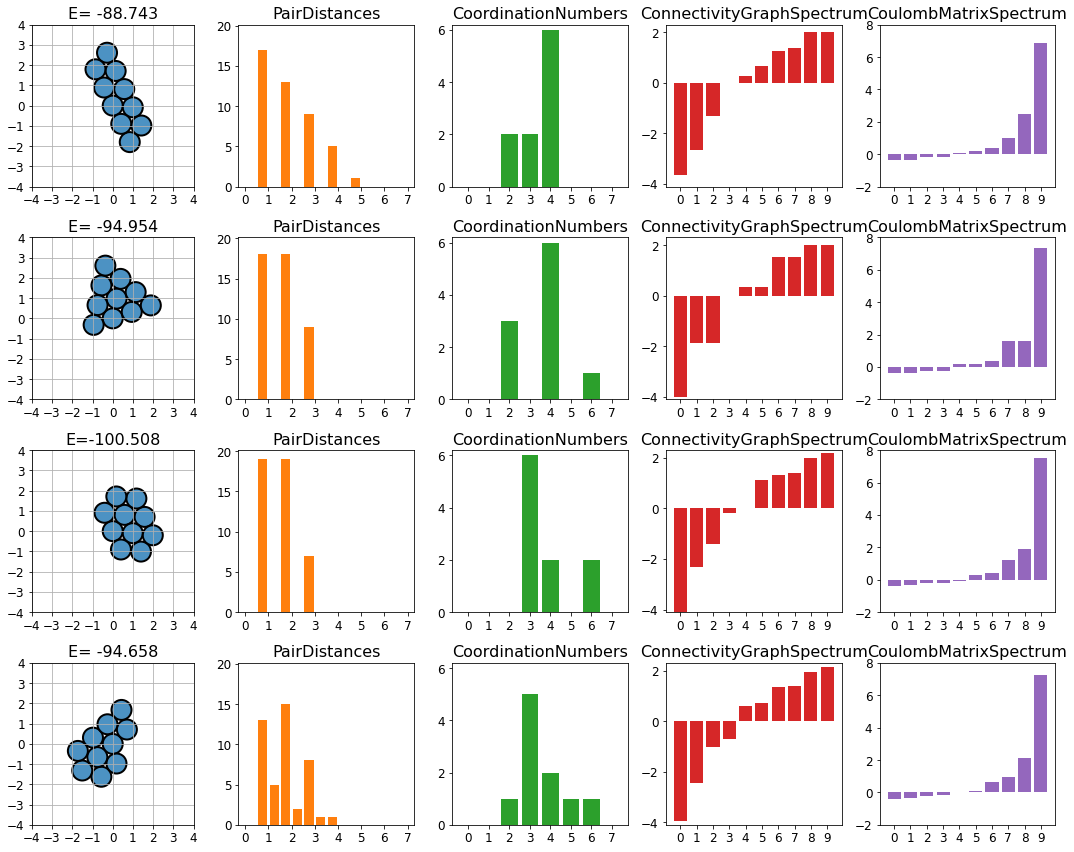

In [10]:
make_plot('exercise_20_fig1.png',[atomic_clusters[i] for i in [37, 5, 36, 16]])

## Use all dims for clustering, then project to two PCA-dim

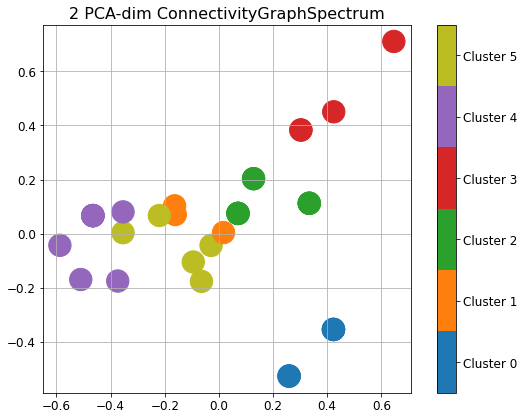

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import cm
from matplotlib.colors import ListedColormap, BoundaryNorm

descriptor = connectivity_graph_spectrum
#descriptor = coordination_numbers
#descriptor = pair_distances

for atomic_cluster in atomic_clusters:
    atomic_cluster.descriptor_method = descriptor

YOUR CODE

# Perform KMeans clustering
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(descriptors)

cmap = ListedColormap([f'C{i}' for i in [0, 1, 2, 3, 4, 8, 5, 6, 7, 9][:n_clusters]])
norm = BoundaryNorm(np.arange(-0.5, n_clusters + 0.5, 1), cmap.N)
alpha = 1

# Create a figure and axis object using object-oriented pyplot
fig, ax = plt.subplots(figsize=(8, 6))

# Perform PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(descriptors)

scatter = ax.scatter(pca_components[:,0],pca_components[:,1],
                     c=clusters, cmap=cmap, norm=norm, s=500, alpha=alpha)

# Add colorbar and labels
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_ticks(np.arange(n_clusters))
cbar.set_ticklabels([f'Cluster {i}' for i in range(n_clusters)])

ax.set_title('2 PCA-dim ' + descriptor.__class__.__name__)
ax.grid(True)
ax.set_aspect('equal')

fig.tight_layout()
fig.savefig('fig1.png')

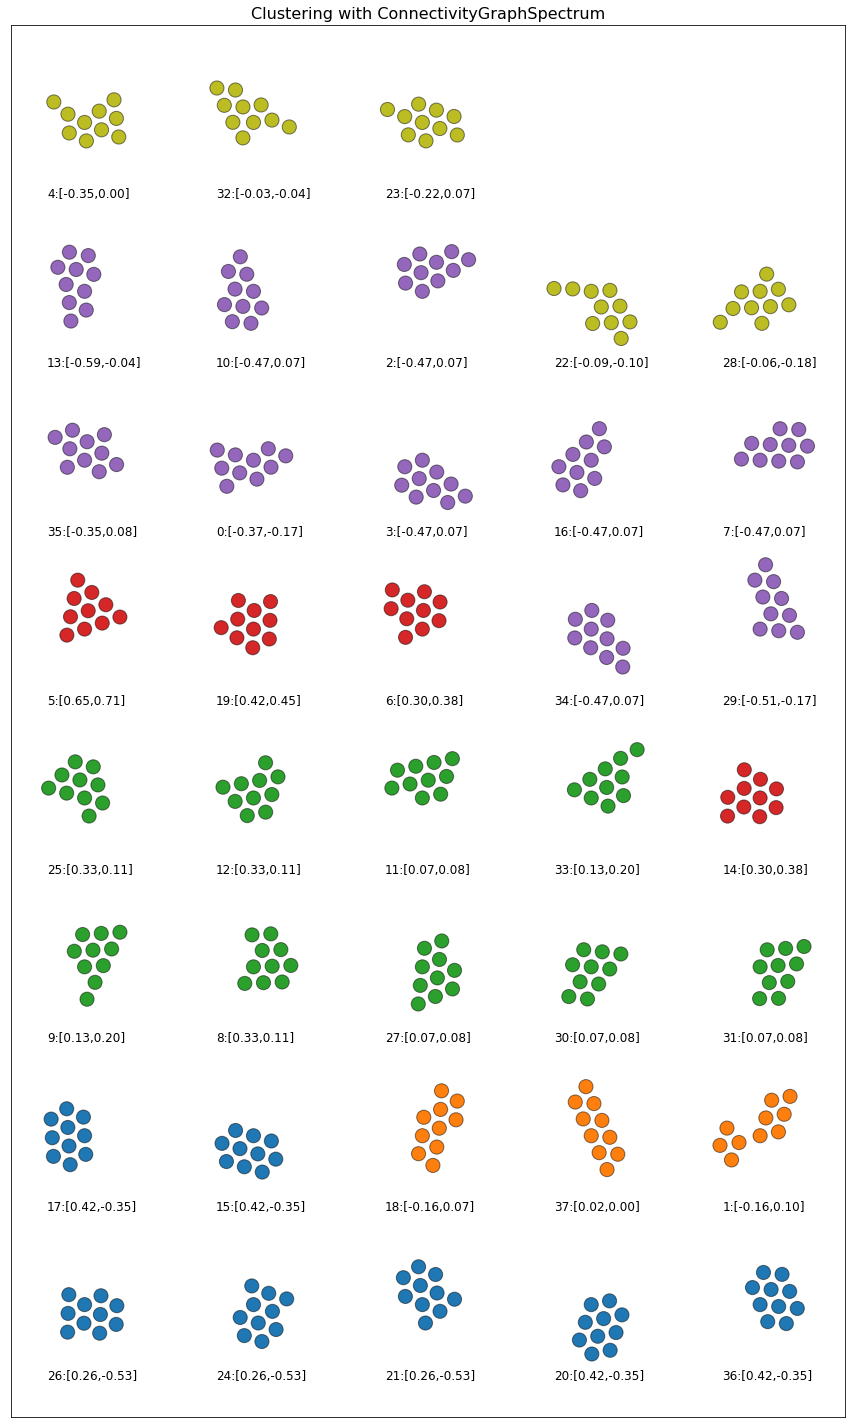

In [12]:
fig, ax = plt.subplots(figsize=(12,20))
a = 5
t = 9
sorted_indices = [int(i) for i in np.argsort(clusters)]
#sorted_indices = range(len(clusters))
disps = {}
for i,(atomic_cluster,cluster,j) in enumerate(zip(np.array(atomic_clusters)[sorted_indices],
                                      clusters[sorted_indices],sorted_indices)):
    atomic_cluster_copy = atomic_cluster.copy()
    disp = disps.get(cluster,0)
    disps[cluster] = disp + 1
    atomic_cluster_copy.set_positions(atomic_cluster.get_positions() + \
                                      t*np.array([(i%a),(i//a)]) +0*np.array([disp,cluster]),
                                ignore_b=True)
    atomic_cluster_copy.draw(ax,size=200,color=cmap(cluster),alpha=alpha,energy_title=False)
    ax.text(t*(i%a)-2,t*(i//a)-4, str(j) + ':' + \
            '[%.2f,%.2f]'%(pca_components[j][0],pca_components[j][1]))
            #','.join([f'{a:.0f}' for a in atomic_cluster.descriptor]))
ax.set_aspect('equal')
ax.set_title('Clustering with ' + atomic_cluster.descriptor_method.__class__.__name__) 
ax.set_xticks([])
ax.set_yticks([])

fig.tight_layout()
fig.savefig('fig2.png')

In [13]:
','.join([f'{a:.0f}' for a in atomic_cluster.descriptor])


'-4,-2,-1,-1,0,1,1,1,2,2'

## Project to two PCA-dim, then cluster


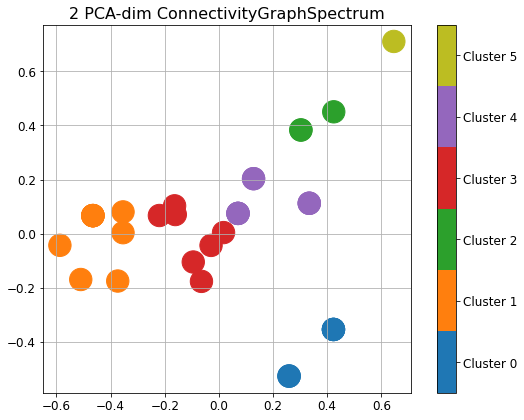

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import cm
from matplotlib.colors import ListedColormap, BoundaryNorm

descriptors = np.array([cluster.descriptor for cluster in atomic_clusters])

# Perform PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
YOUR CODE

# Perform KMeans clustering
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(descriptors)

cmap = ListedColormap([f'C{i}' for i in [0, 1, 2, 3, 4, 8, 5, 6, 7, 9][:n_clusters]])
norm = BoundaryNorm(np.arange(-0.5, n_clusters + 0.5, 1), cmap.N)
alpha = 1

# Create a figure and axis object using object-oriented pyplot
fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter(descriptors[:,0],descriptors[:,1],
                     c=clusters, cmap=cmap, norm=norm, s=500, alpha=alpha)

# Add colorbar and labels
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_ticks(np.arange(n_clusters))
cbar.set_ticklabels([f'Cluster {i}' for i in range(n_clusters)])

ax.set_title('2 PCA-dim ' + descriptor.__class__.__name__)
ax.grid(True)
ax.set_aspect('equal')

fig.tight_layout()
fig.savefig('fig3.png')

[]

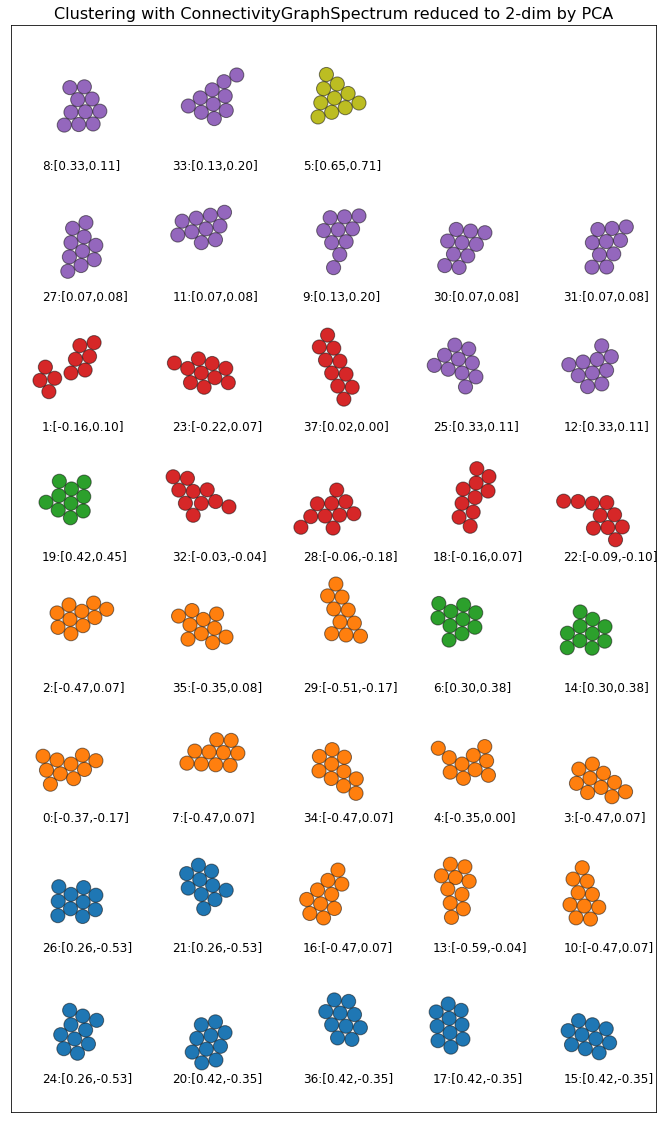

In [15]:
fig, ax = plt.subplots(figsize=(12,20))
a = 5
sorted_indices = [int(i) for i in np.argsort(clusters)]
#sorted_indices = range(len(clusters))
disps = {}
for i,(atomic_cluster,cluster,j) in enumerate(zip(np.array(atomic_clusters)[sorted_indices],
                                      clusters[sorted_indices],sorted_indices)):
    atomic_cluster_copy = atomic_cluster.copy()
    disp = disps.get(cluster,0)
    disps[cluster] = disp + 1
    atomic_cluster_copy.set_positions(atomic_cluster.get_positions() + \
                                      9*np.array([(i%a),(i//a)]) +0*np.array([disp,cluster]),
                                ignore_b=True)
    atomic_cluster_copy.draw(ax,size=200,color=cmap(cluster),alpha=alpha,energy_title=False)
    ax.text(9*(i%a)-2,9*(i//a)-4,str(j) + ':' + '[%.2f,%.2f]'%(descriptors[j][0],descriptors[j][1]))
ax.set_aspect('equal')
ax.set_title('Clustering with ' + atomic_cluster.descriptor_method.__class__.__name__ + ' reduced to 2-dim by PCA') 
ax.set_xticks([])
ax.set_yticks([])

In [16]:
fig.tight_layout()
fig.savefig('fig4.png')